In [30]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [31]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [32]:
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32)
    for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[0.7443],
         [0.4915]]),
 tensor([[1.0000e+00, 7.4431e-01, 2.7700e-01, 6.8726e-02, 1.2788e-02, 1.9037e-03,
          2.3616e-04, 2.5111e-05, 2.3363e-06, 1.9322e-07, 1.4381e-08, 9.7312e-10,
          6.0359e-11, 3.4559e-12, 1.8373e-13, 9.1169e-15, 4.2412e-16, 1.8569e-17,
          7.6785e-19, 3.0080e-20],
         [1.0000e+00, 4.9152e-01, 1.2080e-01, 1.9792e-02, 2.4320e-03, 2.3908e-04,
          1.9586e-05, 1.3753e-06, 8.4496e-08, 4.6147e-09, 2.2682e-10, 1.0135e-11,
          4.1515e-13, 1.5696e-14, 5.5109e-16, 1.8058e-17, 5.5475e-19, 1.6040e-20,
          4.3799e-22, 1.1331e-23]]),
 tensor([5.5257, 5.3209]))

In [33]:
def evaluate_loss(net, data_iter, loss):  
    """评估给定数据集上模型的损失。"""
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [34]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 5.026346   1.3427951 -3.5091155  5.108793 ]]


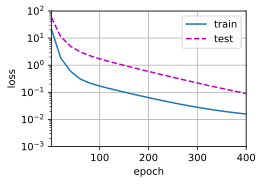

In [35]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.7578971 3.6654496]]


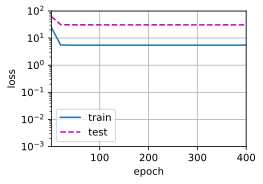

In [36]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 4.9528632e+00  1.2838758e+00 -3.0809767e+00  5.0606937e+00
  -1.2668835e+00  1.1532700e+00 -1.3947929e-01 -1.4563990e-03
   1.9583285e-01  1.2088995e-01  2.0944139e-01  1.5489615e-01
  -2.0280412e-01  1.5979919e-01  7.5765096e-02 -1.5486968e-01
   1.4310154e-01  7.5752318e-02 -1.6031855e-01  2.1902049e-01]]


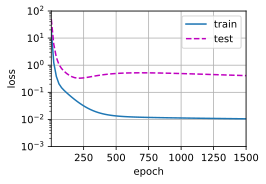

In [37]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)